# 1. Importing source code

In [1]:
# Defined code 
from model.base import Model
from utils.data_loader import load_file, preprocess_labels
from utils.data_cleaning import standardize_data, normalize_data
from utils.notebook_display import experiment_model
import time
import numpy as np
import pandas as pd


# 2.1 Importing the data

In [2]:
X_train = load_file("train_data.npy")
y_train = preprocess_labels(load_file("train_label.npy"))
X_test = load_file("test_data.npy")
y_test = preprocess_labels(load_file("test_label.npy"))
    

# 2.2 Preprocess the Data

In [3]:
X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

X_train_standardized = standardize_data(X_train)
X_test_standardized = standardize_data(X_test)

# 3. Fix the seed for deterministic Training

In [4]:
np.random.seed(42) # Fix  the seed for same training
model_number = 0

# 4. Experiments

#### 4.1 Hidden Layer Sizes

Epoch 1/50, Loss: 2.0856, Accuracy: 0.3518
Epoch 2/50, Loss: 1.9121, Accuracy: 0.3774
Epoch 3/50, Loss: 1.8611, Accuracy: 0.3974
Epoch 4/50, Loss: 1.8183, Accuracy: 0.4140
Epoch 5/50, Loss: 1.7939, Accuracy: 0.4225
Epoch 6/50, Loss: 1.7655, Accuracy: 0.4298
Epoch 7/50, Loss: 1.7424, Accuracy: 0.4411
Epoch 8/50, Loss: 1.7278, Accuracy: 0.4552
Epoch 9/50, Loss: 1.7117, Accuracy: 0.4479
Epoch 10/50, Loss: 1.6952, Accuracy: 0.4564
Epoch 11/50, Loss: 1.6823, Accuracy: 0.4643
Epoch 12/50, Loss: 1.6687, Accuracy: 0.4648
Epoch 13/50, Loss: 1.6615, Accuracy: 0.4704
Epoch 14/50, Loss: 1.6527, Accuracy: 0.4699
Epoch 15/50, Loss: 1.6479, Accuracy: 0.4728
Epoch 16/50, Loss: 1.6358, Accuracy: 0.4710
Epoch 17/50, Loss: 1.6331, Accuracy: 0.4743
Epoch 18/50, Loss: 1.6220, Accuracy: 0.4760
Epoch 19/50, Loss: 1.6172, Accuracy: 0.4833
Epoch 20/50, Loss: 1.6178, Accuracy: 0.4803
Epoch 21/50, Loss: 1.6148, Accuracy: 0.4800
Epoch 22/50, Loss: 1.6084, Accuracy: 0.4808
Epoch 23/50, Loss: 1.6044, Accuracy: 0.48

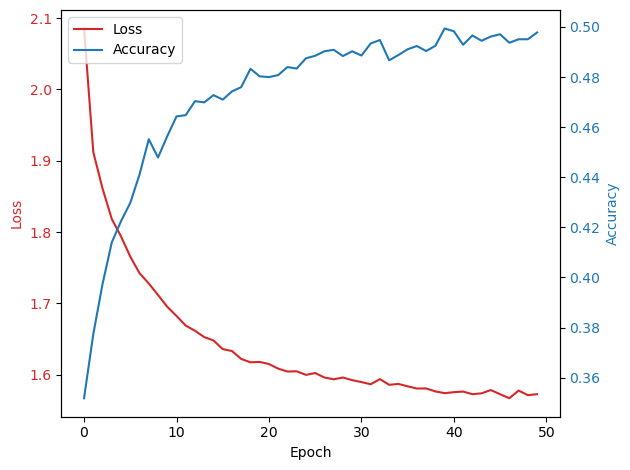

In [ ]:
# Model 0, Testing two hidden layer, h2_size = 68
# Defined by heuristic         
# Default Heuristic for hidden layer size
# h1_size = (i_size + o_size) * 2/3 = 138 * 2/3 = 92
# h2_size = (h1_size + o_size ) * 2/3 = 68

# Hyperparameters 
h1_size=92
h2_size=68
learning_rate=0.001
weight_decay=0.02
momentum=0
dropout_rate=0.5
epoch=50
batch_size=1

activation="relu"
error="cross_entropy"
output_transform="softmax_shifted"

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/50, Loss: 2.1508, Accuracy: 0.3108
Epoch 2/50, Loss: 1.9996, Accuracy: 0.3387
Epoch 3/50, Loss: 1.9347, Accuracy: 0.3680
Epoch 4/50, Loss: 1.9029, Accuracy: 0.3812
Epoch 5/50, Loss: 1.8658, Accuracy: 0.3902
Epoch 6/50, Loss: 1.8460, Accuracy: 0.4086
Epoch 7/50, Loss: 1.8227, Accuracy: 0.4138
Epoch 8/50, Loss: 1.7993, Accuracy: 0.4187
Epoch 9/50, Loss: 1.7854, Accuracy: 0.4250
Epoch 10/50, Loss: 1.7717, Accuracy: 0.4414
Epoch 11/50, Loss: 1.7665, Accuracy: 0.4323
Epoch 12/50, Loss: 1.7473, Accuracy: 0.4408
Epoch 13/50, Loss: 1.7412, Accuracy: 0.4388
Epoch 14/50, Loss: 1.7380, Accuracy: 0.4503
Epoch 15/50, Loss: 1.7298, Accuracy: 0.4474
Epoch 16/50, Loss: 1.7222, Accuracy: 0.4539
Epoch 17/50, Loss: 1.7178, Accuracy: 0.4580
Epoch 18/50, Loss: 1.7137, Accuracy: 0.4577
Epoch 19/50, Loss: 1.7087, Accuracy: 0.4561
Epoch 20/50, Loss: 1.6942, Accuracy: 0.4629
Epoch 21/50, Loss: 1.6968, Accuracy: 0.4628
Epoch 22/50, Loss: 1.6950, Accuracy: 0.4672
Epoch 23/50, Loss: 1.6910, Accuracy: 0.46

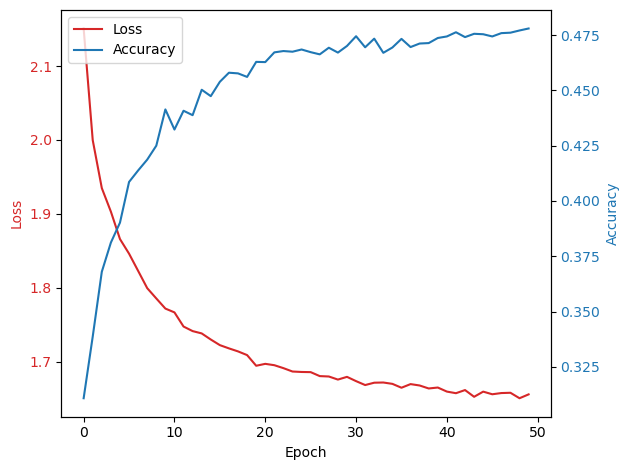

In [6]:
# Model 1, Reducing the size of h2 to be smaller, but still larger than output

# Hyperparameters 
h2_size=30

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/50, Loss: 2.1282, Accuracy: 0.3221
Epoch 2/50, Loss: 1.9574, Accuracy: 0.3531
Epoch 3/50, Loss: 1.9125, Accuracy: 0.3656
Epoch 4/50, Loss: 1.8810, Accuracy: 0.3741
Epoch 5/50, Loss: 1.8569, Accuracy: 0.3868
Epoch 6/50, Loss: 1.8351, Accuracy: 0.4000
Epoch 7/50, Loss: 1.8239, Accuracy: 0.4020
Epoch 8/50, Loss: 1.8084, Accuracy: 0.4021
Epoch 9/50, Loss: 1.7961, Accuracy: 0.4040
Epoch 10/50, Loss: 1.7900, Accuracy: 0.4102
Epoch 11/50, Loss: 1.7788, Accuracy: 0.4173
Epoch 12/50, Loss: 1.7762, Accuracy: 0.4195
Epoch 13/50, Loss: 1.7694, Accuracy: 0.4276
Epoch 14/50, Loss: 1.7674, Accuracy: 0.4295
Epoch 15/50, Loss: 1.7635, Accuracy: 0.4224
Epoch 16/50, Loss: 1.7580, Accuracy: 0.4286
Epoch 17/50, Loss: 1.7569, Accuracy: 0.4304
Epoch 18/50, Loss: 1.7565, Accuracy: 0.4319
Epoch 19/50, Loss: 1.7491, Accuracy: 0.4279
Epoch 20/50, Loss: 1.7432, Accuracy: 0.4319
Epoch 21/50, Loss: 1.7421, Accuracy: 0.4317
Epoch 22/50, Loss: 1.7434, Accuracy: 0.4322
Epoch 23/50, Loss: 1.7398, Accuracy: 0.43

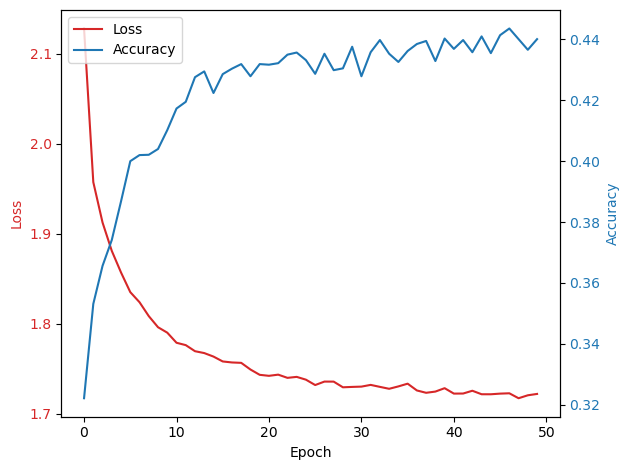

In [7]:
# Model 2, Reducing the size of h1 to be smaller than h2

# Hyperparameters 
h1_size=40 
h2_size=68 # Original Heuristic

activation="relu"
error="cross_entropy"
output_transform="softmax_shifted"

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/50, Loss: 2.0023, Accuracy: 0.3904
Epoch 2/50, Loss: 1.8223, Accuracy: 0.4143
Epoch 3/50, Loss: 1.7617, Accuracy: 0.4324
Epoch 4/50, Loss: 1.7250, Accuracy: 0.4446
Epoch 5/50, Loss: 1.6843, Accuracy: 0.4531
Epoch 6/50, Loss: 1.6625, Accuracy: 0.4613
Epoch 7/50, Loss: 1.6398, Accuracy: 0.4760
Epoch 8/50, Loss: 1.6165, Accuracy: 0.4749
Epoch 9/50, Loss: 1.5943, Accuracy: 0.4879
Epoch 10/50, Loss: 1.5810, Accuracy: 0.4892
Epoch 11/50, Loss: 1.5644, Accuracy: 0.4917
Epoch 12/50, Loss: 1.5489, Accuracy: 0.4973
Epoch 13/50, Loss: 1.5307, Accuracy: 0.5020
Epoch 14/50, Loss: 1.5186, Accuracy: 0.5009
Epoch 15/50, Loss: 1.5108, Accuracy: 0.5059
Epoch 16/50, Loss: 1.4997, Accuracy: 0.5061
Epoch 17/50, Loss: 1.4889, Accuracy: 0.5137
Epoch 18/50, Loss: 1.4850, Accuracy: 0.5138
Epoch 19/50, Loss: 1.4725, Accuracy: 0.5155
Epoch 20/50, Loss: 1.4701, Accuracy: 0.5197
Epoch 21/50, Loss: 1.4650, Accuracy: 0.5207
Epoch 22/50, Loss: 1.4565, Accuracy: 0.5209
Epoch 23/50, Loss: 1.4522, Accuracy: 0.52

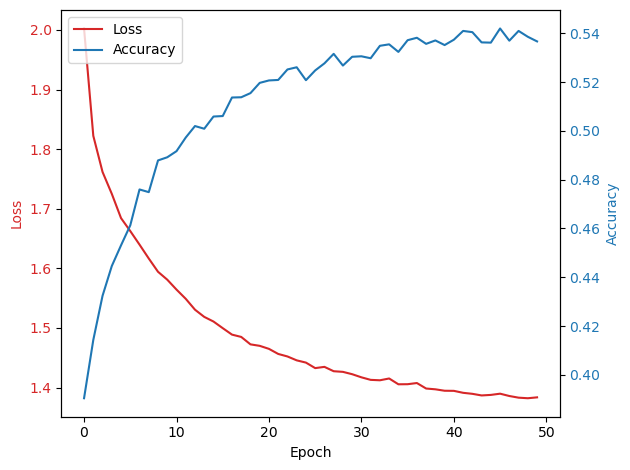

In [ ]:
# Model 3, Increasing size of h2 and h1
h1_size=200
h2_size=150

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=0.02, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

### 4.2 Learning Rate

Epoch 1/50, Loss: 2.1546, Accuracy: 0.2272
Epoch 2/50, Loss: 2.0940, Accuracy: 0.2275
Epoch 3/50, Loss: 2.0745, Accuracy: 0.2362
Epoch 4/50, Loss: 2.0666, Accuracy: 0.2311
Epoch 5/50, Loss: 2.0612, Accuracy: 0.2225
Epoch 6/50, Loss: 2.0557, Accuracy: 0.2553
Epoch 7/50, Loss: 2.0535, Accuracy: 0.2478
Epoch 8/50, Loss: 2.0614, Accuracy: 0.2284
Epoch 9/50, Loss: 2.0534, Accuracy: 0.2465
Epoch 10/50, Loss: 2.0574, Accuracy: 0.2490
Epoch 11/50, Loss: 2.0493, Accuracy: 0.2305
Epoch 12/50, Loss: 2.0544, Accuracy: 0.2631
Epoch 13/50, Loss: 2.0546, Accuracy: 0.2388
Epoch 14/50, Loss: 2.0567, Accuracy: 0.2581
Epoch 15/50, Loss: 2.0549, Accuracy: 0.2460
Epoch 16/50, Loss: 2.0458, Accuracy: 0.2468
Epoch 17/50, Loss: 2.0419, Accuracy: 0.2572
Epoch 18/50, Loss: 2.0487, Accuracy: 0.2504
Epoch 19/50, Loss: 2.0519, Accuracy: 0.2569
Epoch 20/50, Loss: 2.0489, Accuracy: 0.2606
Epoch 21/50, Loss: 2.0452, Accuracy: 0.2515
Epoch 22/50, Loss: 2.0445, Accuracy: 0.2609
Epoch 23/50, Loss: 2.0453, Accuracy: 0.26

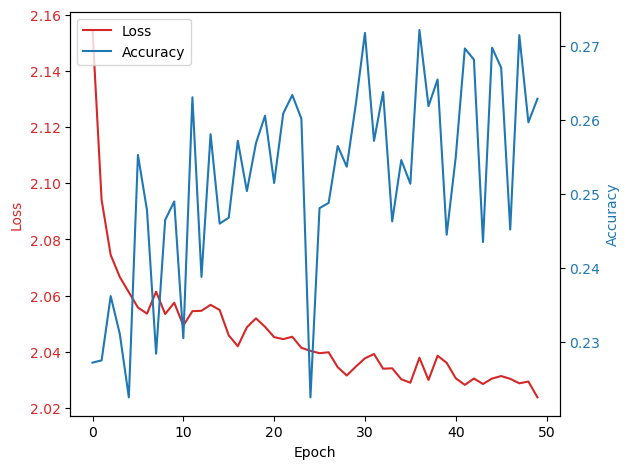

In [9]:
# Model 4, Learning rate at 1%

# Hyperparameters 
h1_size=92
h2_size=68
learning_rate=0.01

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

/Users/arl/dev/University/COMP4329/A1/utils/functions.py:76: RuntimeWarning: invalid value encountered in subtract
  shifted_vector = vector - shift


Epoch 1/50, Loss: nan, Accuracy: 0.1000
Epoch 2/50, Loss: nan, Accuracy: 0.1000
Epoch 3/50, Loss: nan, Accuracy: 0.1000
Epoch 4/50, Loss: nan, Accuracy: 0.1000
Epoch 5/50, Loss: nan, Accuracy: 0.1000
Epoch 6/50, Loss: nan, Accuracy: 0.1000
Epoch 7/50, Loss: nan, Accuracy: 0.1000
Epoch 8/50, Loss: nan, Accuracy: 0.1000
Epoch 9/50, Loss: nan, Accuracy: 0.1000
Epoch 10/50, Loss: nan, Accuracy: 0.1000
Epoch 11/50, Loss: nan, Accuracy: 0.1000
Epoch 12/50, Loss: nan, Accuracy: 0.1000
Epoch 13/50, Loss: nan, Accuracy: 0.1000
Epoch 14/50, Loss: nan, Accuracy: 0.1000
Epoch 15/50, Loss: nan, Accuracy: 0.1000
Epoch 16/50, Loss: nan, Accuracy: 0.1000
Epoch 17/50, Loss: nan, Accuracy: 0.1000
Epoch 18/50, Loss: nan, Accuracy: 0.1000
Epoch 19/50, Loss: nan, Accuracy: 0.1000
Epoch 20/50, Loss: nan, Accuracy: 0.1000
Epoch 21/50, Loss: nan, Accuracy: 0.1000
Epoch 22/50, Loss: nan, Accuracy: 0.1000
Epoch 23/50, Loss: nan, Accuracy: 0.1000
Epoch 24/50, Loss: nan, Accuracy: 0.1000
Epoch 25/50, Loss: nan, A

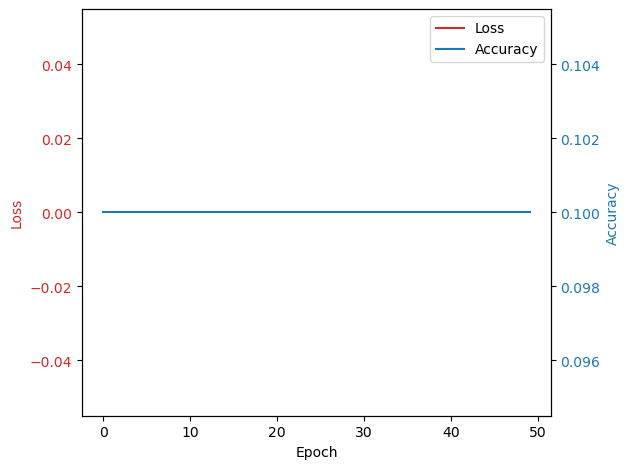

In [ ]:
# Model 5, Learning rate at 10%

# Hyperparameters 
learning_rate=0.1

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/50, Loss: 2.4514, Accuracy: 0.2821
Epoch 2/50, Loss: 2.1642, Accuracy: 0.3095
Epoch 3/50, Loss: 2.0857, Accuracy: 0.3247
Epoch 4/50, Loss: 2.0398, Accuracy: 0.3383
Epoch 5/50, Loss: 2.0067, Accuracy: 0.3498
Epoch 6/50, Loss: 1.9849, Accuracy: 0.3563
Epoch 7/50, Loss: 1.9598, Accuracy: 0.3625
Epoch 8/50, Loss: 1.9456, Accuracy: 0.3696
Epoch 9/50, Loss: 1.9279, Accuracy: 0.3752
Epoch 10/50, Loss: 1.9151, Accuracy: 0.3760
Epoch 11/50, Loss: 1.9032, Accuracy: 0.3819
Epoch 12/50, Loss: 1.8936, Accuracy: 0.3858
Epoch 13/50, Loss: 1.8810, Accuracy: 0.3888
Epoch 14/50, Loss: 1.8699, Accuracy: 0.3897
Epoch 15/50, Loss: 1.8664, Accuracy: 0.3939
Epoch 16/50, Loss: 1.8557, Accuracy: 0.3945
Epoch 17/50, Loss: 1.8473, Accuracy: 0.4013
Epoch 18/50, Loss: 1.8415, Accuracy: 0.4021
Epoch 19/50, Loss: 1.8325, Accuracy: 0.4022
Epoch 20/50, Loss: 1.8245, Accuracy: 0.4055
Epoch 21/50, Loss: 1.8175, Accuracy: 0.4063
Epoch 22/50, Loss: 1.8116, Accuracy: 0.4084
Epoch 23/50, Loss: 1.8039, Accuracy: 0.40

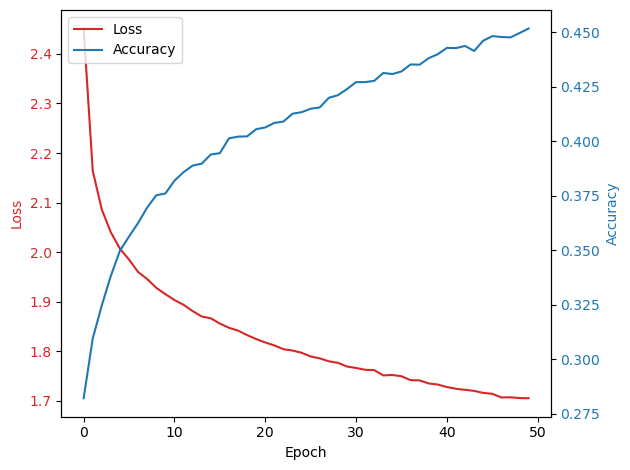

In [13]:
# Model 6, Learning rate at 0.01%

# Hyperparameters 
learning_rate=0.0001

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

### 4.2 Epochs

Epoch 1/10, Loss: 2.0784, Accuracy: 0.3574
Epoch 2/10, Loss: 1.9101, Accuracy: 0.3794
Epoch 3/10, Loss: 1.8529, Accuracy: 0.3999
Epoch 4/10, Loss: 1.8190, Accuracy: 0.4118
Epoch 5/10, Loss: 1.7902, Accuracy: 0.4214
Epoch 6/10, Loss: 1.7614, Accuracy: 0.4360
Epoch 7/10, Loss: 1.7456, Accuracy: 0.4368
Epoch 8/10, Loss: 1.7272, Accuracy: 0.4461
Epoch 9/10, Loss: 1.7079, Accuracy: 0.4530
Epoch 10/10, Loss: 1.6896, Accuracy: 0.4534
Test Accuracy: 45.34%, Training Time: 69.22 seconds, Precision: 0.46, Recall: 0.45, F1 Score: 0.44, Cross Entropy: 1.5418


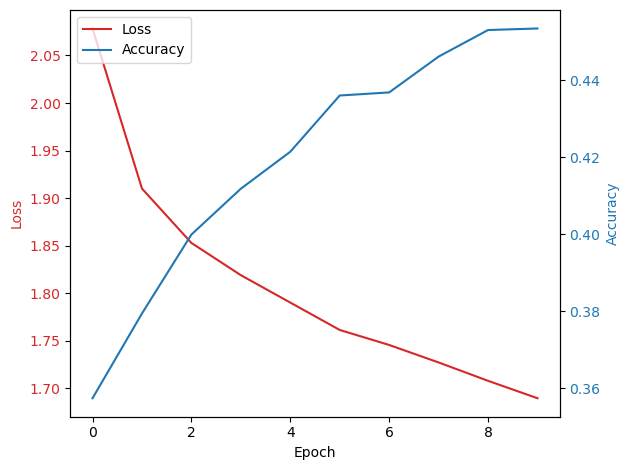

In [14]:
# Model 7, Adjusting Epoch to be significantly lower

# Hyperparameters 
learning_rate=0.001
epoch=10

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/100, Loss: 2.0730, Accuracy: 0.3433
Epoch 2/100, Loss: 1.9055, Accuracy: 0.3862
Epoch 3/100, Loss: 1.8519, Accuracy: 0.4004
Epoch 4/100, Loss: 1.8187, Accuracy: 0.4117
Epoch 5/100, Loss: 1.7831, Accuracy: 0.4293
Epoch 6/100, Loss: 1.7595, Accuracy: 0.4327
Epoch 7/100, Loss: 1.7348, Accuracy: 0.4399
Epoch 8/100, Loss: 1.7232, Accuracy: 0.4491
Epoch 9/100, Loss: 1.7097, Accuracy: 0.4542
Epoch 10/100, Loss: 1.6907, Accuracy: 0.4623
Epoch 11/100, Loss: 1.6825, Accuracy: 0.4666
Epoch 12/100, Loss: 1.6705, Accuracy: 0.4675
Epoch 13/100, Loss: 1.6606, Accuracy: 0.4730
Epoch 14/100, Loss: 1.6498, Accuracy: 0.4729
Epoch 15/100, Loss: 1.6494, Accuracy: 0.4754
Epoch 16/100, Loss: 1.6382, Accuracy: 0.4755
Epoch 17/100, Loss: 1.6336, Accuracy: 0.4814
Epoch 18/100, Loss: 1.6326, Accuracy: 0.4749
Epoch 19/100, Loss: 1.6249, Accuracy: 0.4809
Epoch 20/100, Loss: 1.6186, Accuracy: 0.4833
Epoch 21/100, Loss: 1.6183, Accuracy: 0.4850
Epoch 22/100, Loss: 1.6132, Accuracy: 0.4843
Epoch 23/100, Loss:

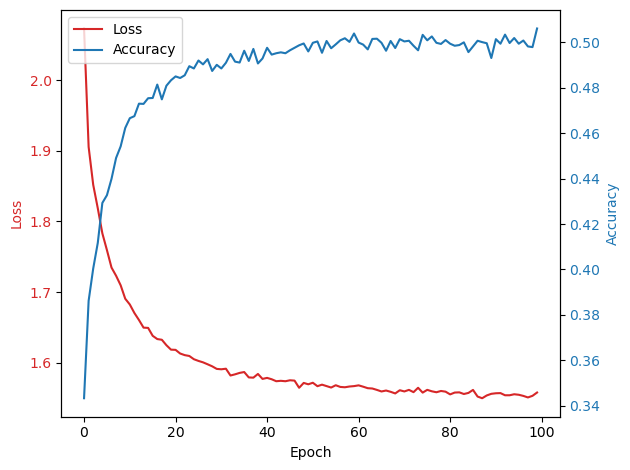

In [15]:
# Model 8, Adjusting epoch to be double

# Hyperparameters 
epoch=100

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

Epoch 1/200, Loss: 2.0861, Accuracy: 0.3493
Epoch 2/200, Loss: 1.9222, Accuracy: 0.3763
Epoch 3/200, Loss: 1.8597, Accuracy: 0.4031
Epoch 4/200, Loss: 1.8280, Accuracy: 0.4103
Epoch 5/200, Loss: 1.7991, Accuracy: 0.4182
Epoch 6/200, Loss: 1.7738, Accuracy: 0.4340
Epoch 7/200, Loss: 1.7465, Accuracy: 0.4374
Epoch 8/200, Loss: 1.7313, Accuracy: 0.4478
Epoch 9/200, Loss: 1.7094, Accuracy: 0.4541
Epoch 10/200, Loss: 1.7039, Accuracy: 0.4579
Epoch 11/200, Loss: 1.6887, Accuracy: 0.4605
Epoch 12/200, Loss: 1.6757, Accuracy: 0.4642
Epoch 13/200, Loss: 1.6702, Accuracy: 0.4650
Epoch 14/200, Loss: 1.6659, Accuracy: 0.4689
Epoch 15/200, Loss: 1.6545, Accuracy: 0.4709
Epoch 16/200, Loss: 1.6415, Accuracy: 0.4738
Epoch 17/200, Loss: 1.6366, Accuracy: 0.4757
Epoch 18/200, Loss: 1.6329, Accuracy: 0.4806
Epoch 19/200, Loss: 1.6259, Accuracy: 0.4794
Epoch 20/200, Loss: 1.6210, Accuracy: 0.4757
Epoch 21/200, Loss: 1.6198, Accuracy: 0.4783
Epoch 22/200, Loss: 1.6174, Accuracy: 0.4826
Epoch 23/200, Loss:

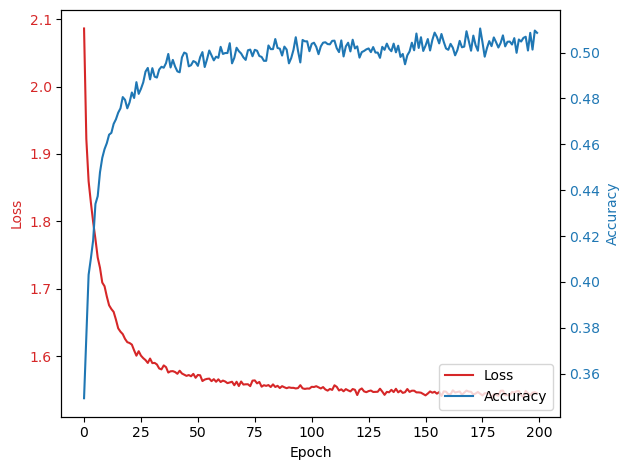

In [16]:
# Model 9, Adjusting epoch to be significantly higher

# Hyperparameters 
epoch=200

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

### 4. Weight decay

Epoch 1/50, Loss: 2.0731, Accuracy: 0.3411
Epoch 2/50, Loss: 1.9156, Accuracy: 0.3798
Epoch 3/50, Loss: 1.8637, Accuracy: 0.3938
Epoch 4/50, Loss: 1.8287, Accuracy: 0.4141
Epoch 5/50, Loss: 1.7997, Accuracy: 0.4235
Epoch 6/50, Loss: 1.7786, Accuracy: 0.4272
Epoch 7/50, Loss: 1.7565, Accuracy: 0.4437
Epoch 8/50, Loss: 1.7404, Accuracy: 0.4422
Epoch 9/50, Loss: 1.7189, Accuracy: 0.4483
Epoch 10/50, Loss: 1.7046, Accuracy: 0.4565
Epoch 11/50, Loss: 1.6983, Accuracy: 0.4569
Epoch 12/50, Loss: 1.6859, Accuracy: 0.4572
Epoch 13/50, Loss: 1.6720, Accuracy: 0.4671
Epoch 14/50, Loss: 1.6643, Accuracy: 0.4630
Epoch 15/50, Loss: 1.6595, Accuracy: 0.4742
Epoch 16/50, Loss: 1.6513, Accuracy: 0.4746
Epoch 17/50, Loss: 1.6436, Accuracy: 0.4721
Epoch 18/50, Loss: 1.6389, Accuracy: 0.4777
Epoch 19/50, Loss: 1.6390, Accuracy: 0.4801
Epoch 20/50, Loss: 1.6303, Accuracy: 0.4793
Epoch 21/50, Loss: 1.6204, Accuracy: 0.4784
Epoch 22/50, Loss: 1.6230, Accuracy: 0.4791
Epoch 23/50, Loss: 1.6184, Accuracy: 0.48

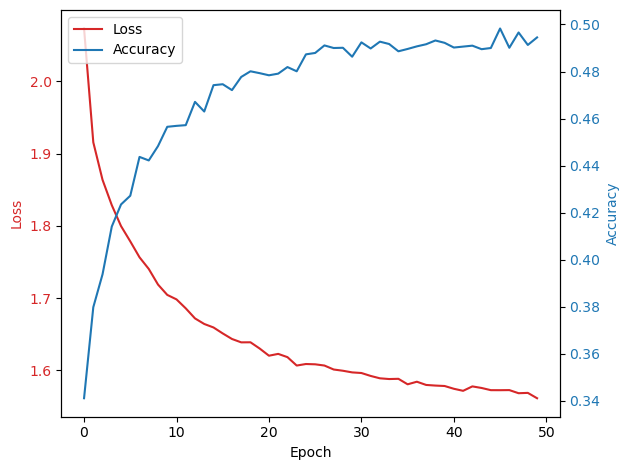

In [17]:
# Model 10, Turning off weight decay

# Hyperparameters 
epoch=50
weight_decay=0

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 

batch training
Epoch 1/0, Loss: 2.0884, Accuracy: 0.3565
Epoch 2/1, Loss: 1.9137, Accuracy: 0.3827
Epoch 3/2, Loss: 1.8640, Accuracy: 0.4026
Epoch 4/3, Loss: 1.8219, Accuracy: 0.4144
Epoch 5/4, Loss: 1.7909, Accuracy: 0.4198
Epoch 6/5, Loss: 1.7694, Accuracy: 0.4326
Epoch 7/6, Loss: 1.7455, Accuracy: 0.4345
Epoch 8/7, Loss: 1.7277, Accuracy: 0.4430
Epoch 9/8, Loss: 1.7112, Accuracy: 0.4502
Epoch 10/9, Loss: 1.6977, Accuracy: 0.4529
Epoch 11/10, Loss: 1.6868, Accuracy: 0.4565
Epoch 12/11, Loss: 1.6757, Accuracy: 0.4583
Epoch 13/12, Loss: 1.6643, Accuracy: 0.4598
Epoch 14/13, Loss: 1.6542, Accuracy: 0.4675
Epoch 15/14, Loss: 1.6462, Accuracy: 0.4708
Epoch 16/15, Loss: 1.6459, Accuracy: 0.4708
Epoch 17/16, Loss: 1.6398, Accuracy: 0.4748
Epoch 18/17, Loss: 1.6318, Accuracy: 0.4754
Epoch 19/18, Loss: 1.6279, Accuracy: 0.4746
Epoch 20/19, Loss: 1.6232, Accuracy: 0.4819
Epoch 21/20, Loss: 1.6191, Accuracy: 0.4758
Epoch 22/21, Loss: 1.6229, Accuracy: 0.4813
Epoch 23/22, Loss: 1.6111, Accuracy:

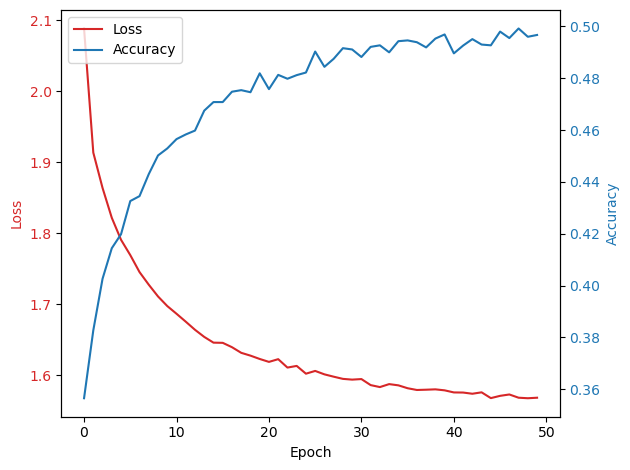

In [ ]:
# Model 11, Batch Training at 1000

# Hyperparameters 
batch_size=1000
weight_decay=0.02

model = Model(activation, error, output_transform, h1_size=h1_size, h2_size=h2_size, learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay, dropout_rate=dropout_rate,)

start_time = time.time()
model_accuracies = model.run_train(X_train, y_train, X_test, y_test, epoch=epoch, batch_size=batch_size)
end_time = time.time()

training_time = end_time - start_time

experiment_model(model, model_accuracies, training_time, X_test, y_test, model_number)
model_number +=1 